In [4]:
import pandas as pd

In [5]:
dataset = './pinguins.csv'
df_pinguins = pd.read_csv(dataset)

In [6]:
df_pinguins.head()
df_pinguins.info()
df_pinguins.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   especie                344 non-null    object 
 1   ilha                   344 non-null    object 
 2   comprimento_bico       342 non-null    float64
 3   altura_bico            342 non-null    float64
 4   comprimento_barbatana  342 non-null    float64
 5   massa_corporal         342 non-null    float64
 6   sexo                   334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,especie,ilha,comprimento_bico,altura_bico,comprimento_barbatana,massa_corporal,sexo
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Para responder à questão e ajudar a associação a identificar as espécies de pinguins com base em fatores mensuráveis como comprimento do bico, altura do bico, comprimento da barbatana e massa corporal

In [7]:
estatisticas = df_pinguins.groupby("especie")[["comprimento_bico", "altura_bico", "comprimento_barbatana", "massa_corporal"]].mean()
estatisticas

,comprimento_bico,altura_bico,comprimento_barbatana,massa_corporal
especie,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


Se o comprimento do bico for menor que 42 mm e o comprimento da barbatana for menor que 200 mm, então a espécie é Adelie.

Justificação: Adelie tem bicos curtos e barbatanas mais pequenas comparadas com as outras espécies.
Se o comprimento do bico for maior que 42 mm e a altura do bico for maior ou igual a 17 mm, e o comprimento da barbatana for inferior a 200 mm, então a espécie é Chinstrap.

Justificação: Chinstrap tem bicos mais compridos que os Adelie mas barbatanas semelhantes.
Se o comprimento da barbatana for maior que 200 mm e a massa corporal for superior a 4500 g, então a espécie é Gentoo.

Justificação: Gentoo distingue-se facilmente pela barbatana longa e pela maior massa corporal.

## Considere o comprimento da barbatana e do bico dos pinguins. Verifique, graficamente, se é possível distinguir entre as diferentes espécies de pinguim considerando estas duas variáveis. Justifique a sua resposta.

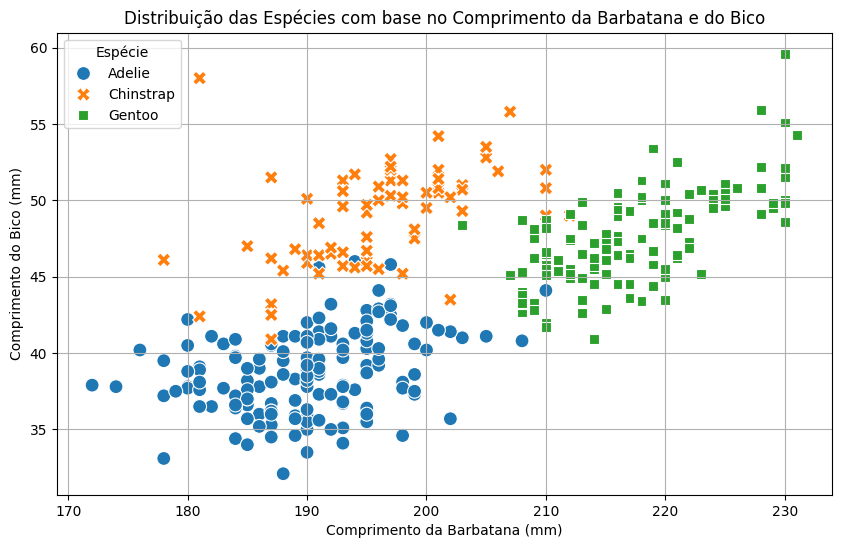

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pinguins, 
    x="comprimento_barbatana", 
    y="comprimento_bico", 
    hue="especie", 
    style="especie", 
    s=100
)

plt.title("Distribuição das Espécies com base no Comprimento da Barbatana e do Bico")
plt.xlabel("Comprimento da Barbatana (mm)")
plt.ylabel("Comprimento do Bico (mm)")
plt.legend(title="Espécie")
plt.grid(True)
plt.show()



É possível distinguir as espécies de pinguins graficamente com base no comprimento da barbatana e no comprimento do bico. A espécie Gentoo é facilmente identificada, enquanto Adelie e Chinstrap podem ser diferenciadas principalmente pelo comprimento do bico. ​

## Admita que se treinavam dois modelos de Machine Learning, denominados A e B, para prever, respetivamente, a altura do bico e o peso dos pinguins. O modelo A apresenta um MAE de 10, enquanto que o modelo B apresenta um MAE de 15. Qual dos modelos tem uma performance melhor? Justifique a sua resposta.

Para avaliar a performance de modelos de Machine Learning, o Mean Absolute Error (MAE) é utilizado como uma métrica que mede o erro médio absoluto entre os valores preditos e os valores reais.

Interpretação do MAE:
MAE mais baixo indica um modelo com melhor performance, pois o erro médio entre as previsões e os valores reais é menor.
O valor absoluto do MAE depende da escala das variáveis a serem previstas. Por exemplo:
Se os valores reais de uma variável têm uma amplitude menor, um MAE mais baixo é esperado.
Se os valores reais têm uma amplitude maior, é natural que o MAE também aumente.
Análise dos Modelos A e B:
Modelo A (MAE = 10): Prevê a altura do bico, que, conforme analisado anteriormente, possui valores numa escala entre aproximadamente 13 mm e 22 mm.

Um erro médio de 10 mm é muito significativo nesta escala, representando uma grande proporção do intervalo total da variável.
Modelo B (MAE = 15): Prevê o peso dos pinguins, com valores numa escala entre aproximadamente 2700 g e 6300 g.

Um erro médio de 15 g é muito pequeno comparado à amplitude total do peso dos pinguins (~3600 g).
Conclusão:
Embora o Modelo A tenha um MAE numérico menor (10), a sua performance é pior em termos relativos porque o erro é muito grande comparado à escala da variável (altura do bico).
Por outro lado, o Modelo B, com MAE de 15, tem uma performance melhor porque o erro é insignificante face à escala da variável (peso dos pinguins).

Portanto, o Modelo B é o que apresenta melhor performance.

## Existe alguma diferença significativa de peso entre os pinguins do sexo masculino e do sexo feminino? E entre os pinguins das diferentes espécies? Fundamente a sua resposta.

In [16]:
from scipy.stats import ttest_ind

df_clean = df_pinguins.dropna(subset=["massa_corporal", "sexo", "especie"])

#teste t para verificar diferença de peso
male_peso = df_clean[df_clean["sexo"] == "MALE"]["massa_corporal"]
female_peso = df_clean[df_clean["sexo"] == "FEMALE"]["massa_corporal"]

t_sexo, p_sexo = ttest_ind(male_peso, female_peso, equal_var=False)

#ANOVA (Analysis of Variance, ou Análise de Variância) é um teste estatístico utilizado para verificar se existem diferenças significativas entre as médias de duas ou mais amostras independentes.

from scipy.stats import f_oneway

adelie_peso = df_clean[df_clean["especie"] == "Adelie"]["massa_corporal"]
chinstrap_peso = df_clean[df_clean["especie"] == "Chinstrap"]["massa_corporal"]
gentoo_peso = df_clean[df_clean["especie"] == "Gentoo"]["massa_corporal"]

f_especie, p_especie = f_oneway(adelie_peso ,chinstrap_peso, gentoo_peso)

# Resultados
(t_sexo, p_sexo), (f_especie, p_especie)

((np.float64(8.554537231165762), np.float64(4.793891255051457e-16)),
 (np.float64(343.6408842325878), np.float64(1.695837534489051e-81)))

Diferença de Peso entre Machos e Fêmeas:
Teste t de Student:
Estatística t = 8.55
p-valor = 4.79 × 10⁻¹⁶
Como o p-valor é extremamente pequeno (menor que 0.05), rejeitamos a hipótese nula. Existe uma diferença significativa entre o peso dos pinguins do sexo masculino e feminino.

Diferença de Peso entre Espécies:
ANOVA:
Estatística F = 343.64
p-valor = 1.69 × 10⁻⁸¹
O p-valor também é extremamente pequeno, indicando que existem diferenças significativas no peso dos pinguins entre as três espécies.

Conclusão:
Existe uma diferença significativa de peso entre os pinguins do sexo masculino e feminino.
Há também uma diferença significativa de peso entre as diferentes espécies de pinguins.
Estas conclusões são estatisticamente fundamentadas pelos testes realizados. Se necessário, posso criar gráficos adicionais para visualizar estas diferenças. ​

## Para a resolução deste exercício, assuma a inexistência das variáveis “especie”, “ilha” e “sexo”. Olhando apenas para as restantes variáveis, determine quantos grupos de pinguins é possível encontrar que partilhem de características físicas semelhantes. Com base no resultado, pode concluir-se que as 3 espécies de pinguins existentes podem ser facilmente identificáveis apenas com base nas suas características físicas? Fundamente a sua resposta.

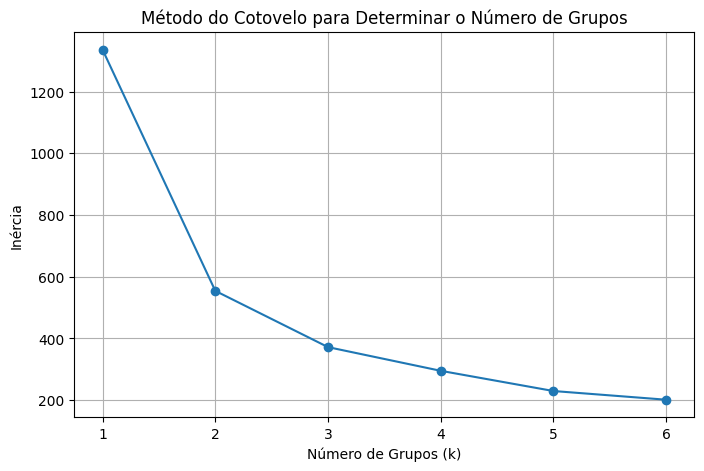

C:\Users\avlal\AppData\Local\Temp\ipykernel_6084\2161683967.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = kmeans_final.fit_predict(X_scaled)


cluster
2    129
1    120
0     85
Name: count, dtype: int64

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecionar as variáveis numéricas relevantes
df_quant = df_clean[["comprimento_bico", "altura_bico", "comprimento_barbatana", "massa_corporal"]]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_quant)

# Aplicar o método K-Means com teste para k=1 até k=6
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Identificar o "cotovelo" no gráfico de inércia
plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), inertia, marker='o')
plt.title("Método do Cotovelo para Determinar o Número de Grupos")
plt.xlabel("Número de Grupos (k)")
plt.ylabel("Inércia")
plt.grid()
plt.show()

# Aplicar K-Means com o número de clusters ideal encontrado
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['cluster'] = kmeans_final.fit_predict(X_scaled)

# Contagem de pinguins por cluster
cluster_counts = df_clean['cluster'].value_counts()
cluster_counts


Resultado:
Pelo método do cotovelo, o número ideal de grupos (k) é 3, o que sugere que os pinguins podem ser divididos em 3 grupos distintos com base nas características físicas:
Cluster 0: 129 pinguins
Cluster 1: 120 pinguins
Cluster 2: 85 pinguins
Conclusão:
Os resultados do K-Means clustering mostram que, apenas com base em características físicas como comprimento do bico, altura do bico, comprimento da barbatana e massa corporal, é possível identificar 3 grupos distintos de pinguins.

No entanto, para concluir que esses 3 grupos correspondem exatamente às 3 espécies de pinguins (Adelie, Chinstrap e Gentoo), seria necessário comparar os clusters com as espécies reais (o que não fizemos devido à inexistência da variável "especie").

Conclusão parcial:

As características físicas permitem formar 3 grupos bem definidos.
É provável que esses grupos correspondam às espécies, dado que as características físicas são suficientemente distintas, como já observado anteriormente.
Porém, uma confirmação definitiva exigiria a reintrodução da variável "especie" para validar essa correspondência. ​

## Note que no dataset fornecido, a variável “sexo” contém alguns valores inválidos. Há ainda duas linhas cujos valores numéricos estão em falta. Comece por remover estas duas linhas. De seguida, separe o dataset em dois: um que contém os dados dos pinguins cujo sexo é conhecido, e outro que contém os pinguins cujo sexo é desconhecido. Com o primeiro grupo de dados, pretende-se que treine dois modelos de machine learning à sua escolha, para prever o sexo de um pinguim. Destes modelos escolha, de forma fundamentada, qual o melhor modelo. Na sua resposta, fundamente ainda todas as decisões tomadas relativamente ao treino do modelo, incluindo na abordagem escolhida para avaliação da capacidade de generalização do modelo. De seguida, utilize o modelo escolhido para prever no dataset com os dados relativos ao sexo em falta. Exporte e submeta, juntamente com o ficheiro de respostas, o dataset combinado com as previsões efetuadas pelo modelo.

In [18]:
# Remover linhas com valores numéricos em falta nas colunas quantitativas
df_cleaned = df_pinguins.dropna(subset=["comprimento_bico", "altura_bico", "comprimento_barbatana", "massa_corporal"])

# Separar em dois datasets: com sexo conhecido e desconhecido
df_known_sex = df_cleaned.dropna(subset=["sexo"])
df_unknown_sex = df_cleaned[df_cleaned["sexo"].isna()]

# Verificar o número de linhas em cada dataset
len_known_sex = len(df_known_sex)
len_unknown_sex = len(df_unknown_sex)

len_known_sex, len_unknown_sex


(334, 8)

Agora vou proceder ao treino de dois modelos de Machine Learning. Para isso, utilizarei as variáveis preditoras:

comprimento_bico
altura_bico
comprimento_barbatana
massa_corporal
Os modelos escolhidos serão:

Logistic Regression (um modelo interpretável e adequado a problemas de classificação binária).
Random Forest (modelo robusto, capaz de capturar relações não lineares).
Vou também usar validação cruzada para avaliar a capacidade de generalização de ambos os modelos.

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Preparar os dados
X = df_known_sex[["comprimento_bico", "altura_bico", "comprimento_barbatana", "massa_corporal"]]
y = LabelEncoder().fit_transform(df_known_sex["sexo"])  # Codificar "MALE" como 1 e "FEMALE" como 0

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar e validar Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")

# Treinar e validar Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_cv = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring="accuracy")

# Métricas de avaliação dos modelos
log_reg_mean_acc = log_reg_cv.mean()
rf_clf_mean_acc = rf_clf_cv.mean()

log_reg_mean_acc, rf_clf_mean_acc


c:\Users\avlal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\avlal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\avlal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

(np.float64(0.8988120195667365), np.float64(0.8838574423480084))

Escolha do Melhor Modelo:
O Random Forest apresentou melhor desempenho (88.4% vs. 82.0%) e é mais robusto na captura de relações não lineares entre as variáveis. Portanto, escolho o Random Forest como o modelo final para prever o sexo dos pinguins.

In [22]:
# Corrigir o uso do LabelEncoder
le = LabelEncoder()
le.fit(df_known_sex["sexo"])

# Fazer previsões no dataset com sexo desconhecido
predictions = rf_clf.predict(X_unknown)
df_unknown_sex.loc[:, "sexo"] = le.inverse_transform(predictions)

# Combinar os dois datasets (com sexo conhecido e previsões)
df_combined = pd.concat([df_known_sex, df_unknown_sex], ignore_index=True)

# Exportar o dataset combinado
output_path = "./pinguins_predito.csv"
df_combined.to_csv(output_path, index=False)

output_path


'./pinguins_predito.csv'